In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [2]:
TRAINING_LOGS_FILE = "jewelry_type_cnn_training_logs.csv"
MODEL_SUMMARY_FILE = "jewelry_type_cnn_model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "jewelry_type_cnn_model.h5"

In [3]:
# Hyperparameters
img_size = 200
img_width, img_height = img_size, img_size
n_epochs = 32
batch_size = 32
test_size = 30 ##CHECK THIS
channels = 3 # color
class_mode = 'binary'

input_shape = (img_width, img_height, channels)

# READING IMAGES

In [4]:
def read_images(dir):
    # rescales images
    datagen = ImageDataGenerator(rescale=1./255)
    
    generator = datagen.flow_from_directory(
        dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        color_mode = 'rgb',
        class_mode = class_mode
    )
    
    return(generator)

In [5]:
datasets = {
    'train': 'data/training', 
    'test': 'data/testing', 
    'valid': 'data/validation',}

key_to_generator = {k: read_images(v) for k,v in datasets.items()}

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
key_to_generator

{'train': <keras.preprocessing.image.DirectoryIterator at 0x62e4400b8>,
 'test': <keras.preprocessing.image.DirectoryIterator at 0x103a49e80>,
 'valid': <keras.preprocessing.image.DirectoryIterator at 0x103a49b70>}

In [7]:
key_to_generator['train']

# MODEL 1

In [8]:
model_1 = Sequential()

model_1.add(Conv2D(32,(3,3), input_shape = input_shape))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(32,(3,3), input_shape = input_shape))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Flatten())
model_1.add(Dense(16))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1))
model_1.add(Activation('sigmoid'))

model_1.compile(loss = 'binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [9]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)            

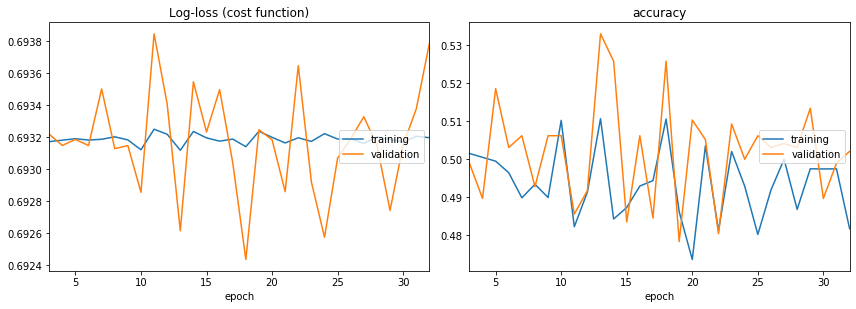

Log-loss (cost function):
training   (min:    0.693, max:    0.803, cur:    0.693)
validation (min:    0.692, max:    0.694, cur:    0.694)

accuracy:
training   (min:    0.474, max:    0.511, cur:    0.482)
validation (min:    0.478, max:    0.533, cur:    0.502)


In [10]:
model_1.fit_generator(
    key_to_generator['train'],
    steps_per_epoch=len(key_to_generator['train'].filenames) // batch_size,
    epochs=n_epochs,
    validation_data=key_to_generator['valid'],
    validation_steps=len(key_to_generator['valid'].filenames) // batch_size,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)

# MODEL 2

In [11]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(128, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1))
model_2.add(Activation('sigmoid'))

model_2.compile(loss='binary_crossentropy',
		optimizer='rmsprop',
		metrics=['accuracy'])

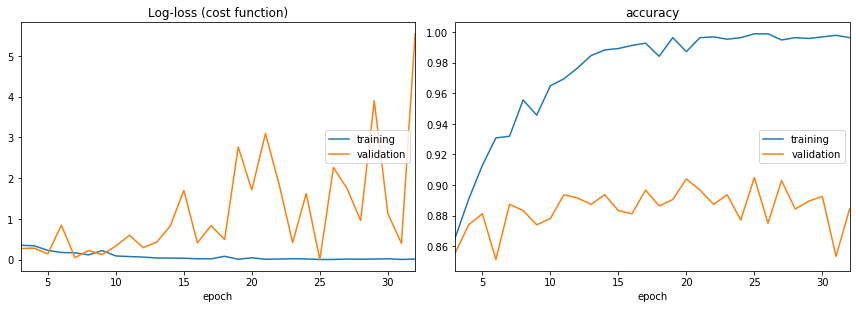

Log-loss (cost function):
training   (min:    0.004, max:    0.731, cur:    0.016)
validation (min:    0.004, max:    5.545, cur:    5.545)

accuracy:
training   (min:    0.720, max:    0.999, cur:    0.996)
validation (min:    0.841, max:    0.905, cur:    0.884)


In [12]:
model_2.fit_generator(
    key_to_generator['train'],
    steps_per_epoch=len(key_to_generator['train'].filenames) // batch_size,
    epochs=n_epochs,
    validation_data=key_to_generator['valid'],
    validation_steps=len(key_to_generator['valid'].filenames) // batch_size,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)